![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Limpieza de datos para crear gráficos descriptivos y modelo de ML

Nos dan un dataset con información relativa da distintas películas y el número de likes que han recibido en Facebook y Twitter. Nos piden:

1. Preparar el dataset para crear un modelo de ML que nos permita predecir el número de likes a partir de las características de las películas.
2. Además del modelo, necesitaremos presentar algunos gráficos a nuestros stakeholders. Es necesario que la data este preparada para ello.
3. Identificar problemas graves en la data y comunicarlos lo antes posible.
4. Adicionalmente, nuestro stakeholder tiene "curiosidad" por algunas cifras:
    - Actores más repetidos en el dataset
    - Géneros de películas más comunes
    - Relación entre presupuesto y recaudación


In [1]:
import pandas as pd
import numpy as np


## Leer datos

In [2]:
df_imdb=pd.read_csv('./data/imdb_clase.csv', sep=';',index_col=0)

In [3]:
df_imdb

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,"$116,866,727.00",Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,"$408,992,272.00",Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,color,Quentin Tarantino,187,"$54,116,191.00",Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000
3,Color,Kenneth Lonergan,186,"$46,495.00",Drama,margaret,2011,English,usa,"USD 14,000,000.00",6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000
4,Color,Peter Jackson,186,"$258,355,354.00",Adventure|Fantasy,the hobbit: the desolation of smaug,2013,English,USA,"USD 225,000,000.00",7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,"$56,667,870.00",Biography|Drama|History,12 years a slave,2013,English,USA,"USD 20,000,000.00",8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000,1000
95,Color,Richard J. Lewis,134,"$7,501,404.00",Comedy|Drama,barney's version,2010,English,Canada,USD nan,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0,1000
96,Color,Paul Greengrass,134,"$107,100,855.00",Biography|Drama|Thriller,captain phillips,2013,English,USA,"USD 55,000,000.00",7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000,1000
97,Color,David Ayer,134,"$85,707,116.00",Action|Drama|War,fury,2014,English,USA,"USD 68,000,000.00",7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000,1000


## Limpieza de datos

### Revisiones generales: `.columns`, `.index`, `.shape`

In [87]:
df_imdb.columns, df_imdb.index,df_imdb.shape

(Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
        'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
        'movie_facebook_likes', 'movie_twitter_likes'],
       dtype='object'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
             51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
             68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
             85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98],
            dtype='int64'),
 (99, 14))

### Ver algunas observaciones: `.head()`, `.tail()`, `.sample()`

In [88]:
df_imdb.head(),df_imdb.tail(),df_imdb.sample()

(    color      director_name  duration            gross  \
 0   Color    Martin Scorsese       240  $116,866,727.00   
 1   Color        Shane Black       195  $408,992,272.00   
 2  color   Quentin Tarantino       187   $54,116,191.00   
 3   Color   Kenneth Lonergan       186       $46,495.00   
 4   Color      Peter Jackson       186  $258,355,354.00   
 
                                  genres                          movie_title  \
 0          Biography|Comedy|Crime|Drama              the wolf of wall street   
 1               Action|Adventure|Sci-Fi                           iron man 3   
 2  Crime|Drama|Mystery|Thriller|Western                    the hateful eight   
 3                                 Drama                             margaret   
 4                     Adventure|Fantasy  the hobbit: the desolation of smaug   
 
    title_year language country              budget  imdb_score  \
 0        2013  English     USA  USD 100,000,000.00         8.2   
 1        2013  

### Describir dataset: `info()`, `describe()`

In [89]:
df_imdb.info(), df_imdb.describe(), df_imdb.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 99 non-null     object 
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                99 non-null     object 
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
 13  movie_twitter_likes   99 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 11.6+ KB


(None,
          duration   title_year  imdb_score  movie_facebook_likes  \
 count   99.000000    99.000000   99.000000             99.000000   
 mean   155.494949  1944.010101    6.892929          66045.707071   
 std     72.797927   393.848787    1.925514          58108.860365   
 min    -50.000000 -1000.000000   -7.500000              0.000000   
 25%    138.500000  2012.000000    6.550000          25000.000000   
 50%    143.000000  2013.000000    7.200000          54000.000000   
 75%    155.000000  2014.000000    7.850000          85500.000000   
 max    650.000000  2030.000000    8.800000         349000.000000   
 
        movie_twitter_likes  
 count                 99.0  
 mean                1000.0  
 std                    0.0  
 min                 1000.0  
 25%                 1000.0  
 50%                 1000.0  
 75%                 1000.0  
 max                 1000.0  ,
         color director_name    duration gross                   genres  \
 count      88          

### Valores faltantes: `.isnull()`, `.isna()`

In [90]:
df_imdb.isnull().any(), df_imdb.isna().sum()

(color                    True
 director_name            True
 duration                False
 gross                   False
 genres                   True
 movie_title             False
 title_year              False
 language                False
 country                 False
 budget                  False
 imdb_score              False
 actors                  False
 movie_facebook_likes    False
 movie_twitter_likes     False
 dtype: bool,
 color                   11
 director_name           11
 duration                 0
 gross                    0
 genres                   1
 movie_title              0
 title_year               0
 language                 0
 country                  0
 budget                   0
 imdb_score               0
 actors                   0
 movie_facebook_likes     0
 movie_twitter_likes      0
 dtype: int64)

### Quitar filas duplicadas: `.duplicated()`. `.drop_duplicates()`

In [4]:
df_imdb[df_imdb.duplicated(keep=False)].T

,8,9,30,31,52,53,54,55,61,63
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,Joss Whedon,Joss Whedon,Ridley Scott,Ridley Scott,Sam Mendes,Sam Mendes,Baz Luhrmann,Baz Luhrmann,Timur Bekmambetov,Timur Bekmambetov
duration,173,173,150,150,143,143,143,143,141,141
gross,"$623,279,547.00","$623,279,547.00","$65,007,045.00","$65,007,045.00","$304,360,277.00","$304,360,277.00","$144,812,796.00","$144,812,796.00",$nan,$nan
genres,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi,Action|Adventure|Drama,Action|Adventure|Drama,Action|Adventure|Thriller,Action|Adventure|Thriller,Drama|Romance,Drama|Romance,Adventure|Drama|History,Adventure|Drama|History
movie_title,the avengers,the avengers,exodus: gods and kings,exodus: gods and kings,skyfall,skyfall,the great gatsby,the great gatsby,ben-hur,ben-hur
title_year,2012,2012,2014,2014,2012,2012,2013,2013,2016,2016
language,English,English,English,English,English,English,English,English,English,English
country,USA,USA,UK,UK,UK,UK,Australia,Australia,USA,USA
budget,"USD 220,000,000.00","USD 220,000,000.00","USD 140,000,000.00","USD 140,000,000.00","USD 200,000,000.00","USD 200,000,000.00","USD 105,000,000.00","USD 105,000,000.00","USD 100,000,000.00","USD 100,000,000.00"


In [5]:
df_imdb.drop_duplicates(inplace=True)

In [6]:
df_imdb.shape

(94, 14)

## Tratamiento de columnas

Dylan:

- `color`
- `director_name`
- `gross`
- `duration`

Todos:
- `movie_title`
- `title_year`
- `movie_twitter_likes`
- `imdb_score`
- `country`
- `language`
- `actors`
- `movie_facebook_likes`


### Columna `color`

In [11]:
df_imdb.color.value_counts(dropna=False)

Color              93
Black and white     1
Name: color, dtype: int64

In [8]:
df_imdb.loc[df_imdb.color.isnull(),'color']='Color'

In [9]:
df_imdb.color=df_imdb.color.str.strip().str.capitalize()

In [10]:
assert df_imdb.color.isnull().any()==False

### Columna `director_name`

In [16]:
df_imdb.director_name.value_counts(dropna=False)

NaN                  11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Kenneth Lonergan      1
Clint Eastwood        1
Name: director_name, Length: 64, dtype: int64

In [17]:
df_imdb[df_imdb.director_name.isnull()].T

,5,24,32,41,56,59,71,75,82,84,91
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,183,156,150,147,143,142,139,138,137,137,136
gross,"$330,249,062.00","$183,635,922.00","$182,204,440.00","$407,197,282.00",$nan,"$407,999,255.00","$150,832,203.00","$150,117,807.00","$37,304,950.00","$281,666,058.00","$52,474,616.00"
genres,Action|Adventure|Sci-Fi,Adventure|Drama|Thriller|Western,Biography|Drama|History|War,Action|Adventure|Sci-Fi,Drama|Horror|Thriller,Adventure|Drama|Sci-Fi|Thriller,Adventure|Mystery|Sci-Fi,Crime|Drama,Biography|Crime|Drama,Adventure|Sci-Fi,Drama
movie_title,batman v superman: dawn of justice,the revenant,lincoln,captain america: civil war,the ridges,the hunger games,divergent,american hustle,j. edgar,the hunger games: mockingjay - part 2,wall street: money never sleeps
title_year,202,2015,2012,2016,2011,2012,1800,2013,2011,2015,2010
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
budget,"USD 250,000,000.00","USD 135,000,000.00","USD 65,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 78,000,000.00","USD 85,000,000.00","USD 40,000,000.00","USD 35,000,000.00","USD 160,000,000.00","USD 70,000,000.00"


In [19]:
df_imdb.loc[df_imdb.director_name.isnull(),'director_name']='No information available'

In [20]:
df_imdb.director_name.value_counts(dropna=False)

No information available    13
Peter Jackson                3
Christopher Nolan            3
Ridley Scott                 3
Michael Bay                  3
                            ..
Adam McKay                   1
Zack Snyder                  1
Baz Luhrmann                 1
Justin Chadwick              1
Clint Eastwood               1
Name: director_name, Length: 62, dtype: int64

In [102]:
df_imdb.loc[(df_imdb.director_name=='Nan') | (df_imdb.director_name=='Null') ,'director_name']='No information available'

In [18]:
df_imdb.loc[df_imdb.director_name.str.lower().str.strip().isin(['null','nan']),'director_name']='No information available'

In [104]:
"""df_imdb.loc[df_imdb.director_name.str.lower().str.strip().str.match('null'|'nan'),'director_name']='No information available'"""

"df_imdb.loc[df_imdb.director_name.str.lower().str.strip().str.match('null'|'nan'),'director_name']='No information available'"

### Columna `gross`

In [21]:
df_imdb.gross.value_counts(dropna=False)


$nan               6
$148,775,460.00    2
$115,603,980.00    2
$116,866,727.00    1
$80,574,010.00     1
                  ..
$3,958,500.00      1
$182,204,440.00    1
$65,007,045.00     1
$228,430,993.00    1
$47,034,272.00     1
Name: gross, Length: 87, dtype: int64

In [22]:
df_imdb.gross=df_imdb.gross.str.replace('$','',regex=False).str.replace(',','').astype('float')

In [23]:
df_imdb.gross.isnull().sum()

6

In [108]:
df_imdb.gross.mean()

1136505020628.125

In [109]:
df_imdb.gross


0     1.168667e+08
1     4.089923e+08
2     5.411619e+07
3     4.649500e+04
4     2.583554e+08
5     3.302491e+08
6     3.030012e+08
7              NaN
8     6.232795e+08
10    2.709858e+07
11    1.025158e+08
12    5.969618e+07
13    1.879914e+08
14    1.000000e+14
15    2.535920e+07
16    1.628046e+08
17    2.454281e+08
18    4.481306e+08
19    2.551084e+08
20    1.487755e+08
21    1.487755e+08
22    9.572072e+07
23    1.052197e+08
24    1.836359e+08
25    3.523588e+08
26    6.096288e+07
27             NaN
28    2.620307e+08
29    2.284310e+08
30    6.500704e+07
32    1.822044e+08
33    3.958500e+06
34    8.928991e+07
35    1.677354e+08
36    2.339150e+08
37             NaN
38    2.925689e+08
39    8.093318e+06
40    2.000742e+08
41    4.071973e+08
42    9.532894e+07
43    1.697056e+08
44    4.246456e+08
45    7.988336e+07
46    5.282242e+07
47    4.122900e+04
48    1.637727e+07
49    1.549851e+08
50    2.175312e+06
51   -1.532000e+03
52    3.043603e+08
54    1.448128e+08
56          

In [110]:
df_imdb.gross.describe()

count    8.800000e+01
mean     1.136505e+12
std      1.066002e+13
min     -9.293900e+04
25%      4.158910e+07
50%      1.061603e+08
75%      2.298020e+08
max      1.000000e+14
Name: gross, dtype: float64

<AxesSubplot:>

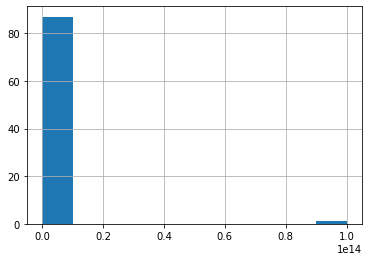

In [111]:
df_imdb.gross.hist()

In [24]:
df_imdb.loc[(df_imdb.gross>1e9) | (df_imdb.gross<0),'gross']=np.nan

In [25]:
df_imdb.gross.isnull().sum()

9

In [26]:
df_imdb.loc[df_imdb.gross.isnull(),'gross']=df_imdb.gross.mean()

In [27]:
assert df_imdb.gross.isnull().any()==False

### Columna `genres`


In [116]:
df_imdb

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,1.168667e+08,Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,4.089923e+08,Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,Color,Quentin Tarantino,187,5.411619e+07,Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000
3,Color,Kenneth Lonergan,186,4.649500e+04,Drama,margaret,2011,English,usa,"USD 14,000,000.00",6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000
4,Color,Peter Jackson,186,2.583554e+08,Adventure|Fantasy,the hobbit: the desolation of smaug,2013,English,USA,"USD 225,000,000.00",7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000
5,Color,No information available,183,3.302491e+08,Action|Adventure|Sci-Fi,batman v superman: dawn of justice,202,English,USA,"USD 250,000,000.00",6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,1000
6,Color,Peter Jackson,-50,3.030012e+08,Adventure|Fantasy,the hobbit: an unexpected journey,2012,English,USA,"USD 180,000,000.00",7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000,1000
7,Color,Edward Hall,180,1.463754e+08,Drama|Romance,restless,2012,English,UK,USD nan,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434,1000
8,Color,Joss Whedon,173,6.232795e+08,Action|Adventure|Sci-Fi,the avengers,2012,English,USA,"USD 220,000,000.00",8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,1000
10,Color,Tom Tykwer,172,2.709858e+07,Drama|Sci-Fi,cloud atlas,2012,English,Germany,"USD 102,000,000.00",-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000,1000


In [28]:
df_imdb[df_imdb.genres.isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
12,Color,Christopher Spencer,170,59696176.0,NaN,son of god,2014,English,USA,"USD 22,000,000.00",5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000,1000


In [29]:
df_imdb.loc[df_imdb.genres.isnull(),'genres']='Drama|Sci-Fi'

In [30]:
df_imdb.genres.str.split('|').str.len().max()

5

In [31]:
generos_cols=df_imdb.genres.str.split('|',n=5,expand=True)

In [32]:
df_imdb['genero_1']=generos_cols[0]
df_imdb['genero_2']=generos_cols[1]
df_imdb['genero_3']=generos_cols[2]
df_imdb['genero_4']=generos_cols[3]
df_imdb['genero_5']=generos_cols[4]

<AxesSubplot:>

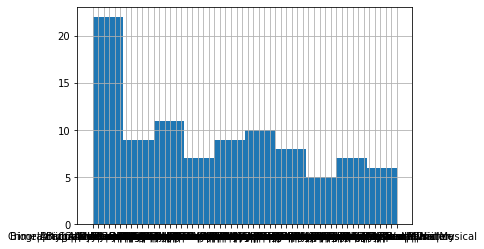

In [122]:
df_imdb.genres.hist()

In [33]:
df_imdb.drop('genres',axis=1,inplace=True)

### Columna `budget`

In [34]:
df_imdb.budget

0     USD 100,000,000.00
1     USD 200,000,000.00
2      USD 44,000,000.00
3      USD 14,000,000.00
4     USD 225,000,000.00
             ...        
94     USD 20,000,000.00
95               USD nan
96     USD 55,000,000.00
97     USD 68,000,000.00
98     USD 40,000,000.00
Name: budget, Length: 94, dtype: object

In [35]:
df_imdb.budget=df_imdb.budget.str.replace('USD','',regex=False).str.replace(',','').astype('float')

In [36]:
df_imdb.budget.isnull().sum()

4

In [37]:
df_imdb.budget.describe()

count    9.000000e+01
mean     1.021824e+08
std      7.742864e+07
min      1.735000e+04
25%      4.000000e+07
50%      7.250000e+07
75%      1.687500e+08
max      2.500000e+08
Name: budget, dtype: float64

In [38]:
df_imdb.loc[df_imdb.budget.isnull(),'budget']=df_imdb.budget.mean()

<AxesSubplot:xlabel='budget', ylabel='gross'>

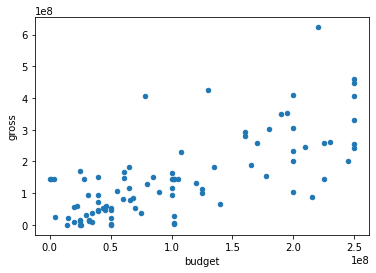

In [112]:
df_imdb.plot.scatter(x="budget", y="gross")


### Columna `duration`

In [40]:
df_imdb.duration

0     240
1     195
2     187
3     186
4     186
     ... 
94    134
95    134
96    134
97    134
98      5
Name: duration, Length: 94, dtype: int64

In [41]:
df_imdb.duration.value_counts(dropna=False)

 141    6
 137    6
 138    6
 136    5
 143    5
 134    4
 148    4
 146    4
 139    4
 144    4
 140    4
 142    3
 153    3
 158    3
 150    3
 165    2
 149    2
 164    2
 156    2
 135    2
 186    2
 147    1
 240    1
 650    1
 151    1
 195    1
 154    1
 157    1
 580    1
 167    1
 169    1
 170    1
 172    1
 173    1
 180    1
-50     1
 183    1
 187    1
 5      1
Name: duration, dtype: int64

In [42]:
df_imdb.duration.describe()

count     94.000000
mean     155.787234
std       74.666840
min      -50.000000
25%      138.000000
50%      143.500000
75%      155.500000
max      650.000000
Name: duration, dtype: float64

In [43]:
df_imdb.duration.isna().sum()

0

<AxesSubplot:>

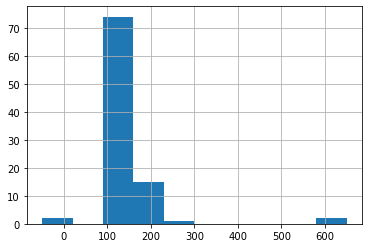

In [134]:
df_imdb.duration.hist()

In [44]:
df_imdb.loc[(df_imdb.duration>400) | (df_imdb.duration<=5),'duration']=np.nan

In [45]:
df_imdb.loc[df_imdb.duration.isnull(),'duration']=df_imdb.duration.median()

In [137]:
def identify_films(gross, rating):
    if gross > 150_000_000 and rating < 6.5:
        return "High gross, low rating"
    if gross<80_000_000 and rating >8:
        return "Low gross, high rating"
    return 'Normal'

In [138]:
df_imdb['type_film']=df_imdb.apply(lambda row:identify_films(row['gross'],row['imdb_score']),axis=1)

## Guardar dataset

In [139]:
df_imdb.to_csv('data/imdb_final.csv',sep=';',index=False)


### Columna `movie_title`

In [46]:
df_imdb.movie_title.value_counts(dropna=False)

unbroken                   2
les misérables             2
ben-hur                    2
the wolf of wall street    1
get on up                  1
                          ..
lincoln                    1
exodus: gods and kings     1
the martian                1
the amazing spider-man     1
jersey boys                1
Name: movie_title, Length: 91, dtype: int64

In [47]:
df_imdb.drop_duplicates('movie_title',inplace=True)

In [48]:
df_imdb.shape

(91, 18)

In [49]:
df_imdb.movie_title=df_imdb.movie_title.str.title()

In [113]:
df_imdb.movie_title

0                 The Wolf Of Wall Street
1                              Iron Man 3
2                       The Hateful Eight
3                                Margaret
4     The Hobbit: The Desolation Of Smaug
                     ...                 
94                       12 Years A Slave
95                       Barney'S Version
96                       Captain Phillips
97                                   Fury
98                            Jersey Boys
Name: movie_title, Length: 91, dtype: object

### Columna `title_year`

In [51]:
df_imdb.title_year.value_counts(dropna=False)

 2014    21
 2012    18
 2013    17
 2011    10
 2015     8
 2010     7
 2016     5
 202      1
-1000     1
 2030     1
 1800     1
 205      1
Name: title_year, dtype: int64

In [52]:
df_imdb[(df_imdb.title_year<=205) | (df_imdb.title_year==2030) | (df_imdb.title_year==1800) ]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5
5,Color,No information available,183.0,330249062.0,Batman V Superman: Dawn Of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,1000,Action,Adventure,Sci-Fi,None,None
20,Color,Tom Hooper,158.0,148775460.0,Les Misérables,-1000,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000,1000,Drama,Musical,Romance,None,None
60,Color,Joss Whedon,141.0,458991599.0,Avengers: Age Of Ultron,2030,English,USA,250000000.0,7.5,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",118000,1000,Action,Adventure,Sci-Fi,None,None
71,Color,No information available,139.0,150832203.0,Divergent,1800,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000,1000,Adventure,Mystery,Sci-Fi,None,None
81,Color,Daniel Espinosa,137.0,1206135.0,Child 44,205,English,Czech Republic,50000000.0,6.4,"Tom Hardy,Fares Fares,Michael Nardone",18000,1000,Crime,Drama,Thriller,None,None


In [53]:
df_imdb.loc[df_imdb.title_year==202,'title_year']=2016

In [54]:
df_imdb.loc[df_imdb.title_year==-1000,'title_year']=2012

In [55]:
df_imdb.loc[df_imdb.title_year==2030,'title_year']=2015

In [56]:
df_imdb.loc[df_imdb.title_year==205,'title_year']=2015

In [57]:
df_imdb.loc[df_imdb.title_year==1800,'title_year']=2014

In [114]:
df_imdb.title_year.value_counts(dropna=False)

2014    22
2012    19
2013    17
2015    10
2011    10
2010     7
2016     6
Name: title_year, dtype: int64

### Columna `movie_twitter_likes`

In [59]:
df_imdb.movie_twitter_likes.value_counts(dropna=False)

1000    91
Name: movie_twitter_likes, dtype: int64

In [158]:
df_imdb.movie_twitter_likes.describe()

count      91.0
mean     1000.0
std         0.0
min      1000.0
25%      1000.0
50%      1000.0
75%      1000.0
max      1000.0
Name: movie_twitter_likes, dtype: float64

<AxesSubplot:>

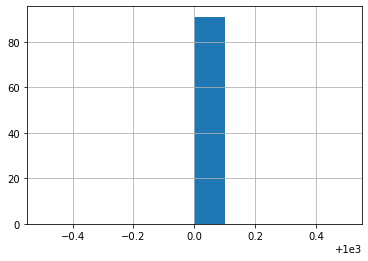

In [159]:
df_imdb.movie_twitter_likes.hist()

In [124]:
df_imdb.drop('movie_twitter_likes',axis=1,inplace=True)

In [125]:
df_imdb


,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,movie_facebook_likes,genero_1,genero_2,genero_3,genero_4,genero_5,actor_0,actor_1,actor_2
0,Color,Martin Scorsese,240.0,116866727.0,The Wolf Of Wall Street,2013,English,USA,100000000.0,8.2,138000.0,Biography,Comedy,Crime,Drama,None,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Color,Shane Black,195.0,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,95000.0,Action,Adventure,Sci-Fi,None,None,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Color,Quentin Tarantino,187.0,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,114000.0,Crime,Drama,Mystery,Thriller,Western,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Color,Kenneth Lonergan,186.0,46495.0,Margaret,2011,English,USA,14000000.0,6.5,0.0,Drama,None,None,None,None,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Color,Peter Jackson,186.0,258355354.0,The Hobbit: The Desolation Of Smaug,2013,English,USA,225000000.0,7.9,83000.0,Adventure,Fantasy,None,None,None,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134.0,56667870.0,12 Years A Slave,2013,English,USA,20000000.0,8.1,83000.0,Biography,Drama,History,None,None,Quvenzhané Wallis,Scoot McNairy,Taran Killam
95,Color,Richard J. Lewis,134.0,7501404.0,Barney'S Version,2010,English,Canada,102182415.0,7.3,0.0,Comedy,Drama,None,None,None,Mark Addy,Atom Egoyan,Paul Gross
96,Color,Paul Greengrass,134.0,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,65000.0,Biography,Drama,Thriller,None,None,Tom Hanks,Chris Mulkey,Michael Chernus
97,Color,David Ayer,134.0,85707116.0,Fury,2014,English,USA,68000000.0,7.6,82000.0,Action,Drama,War,None,None,Brad Pitt,Logan Lerman,Jim Parrack


### Columna `imdb_score`

In [60]:
df_imdb.imdb_score.value_counts(dropna=False)

 6.7    9
 8.1    8
 7.3    7
 7.9    5
 7.2    5
 7.6    4
 6.5    4
 6.1    4
 7.4    4
 8.2    3
 6.3    3
 7.8    3
 6.9    3
 8.5    2
 7.5    2
 8.0    2
 7.0    2
 6.6    2
 6.8    2
 5.7    2
 7.1    2
 5.8    1
 5.9    1
-1.2    1
 6.4    1
 5.3    1
 8.8    1
 3.0    1
 4.3    1
 8.4    1
-7.5    1
 5.6    1
 8.6    1
 8.7    1
Name: imdb_score, dtype: int64

In [61]:
df_imdb.imdb_score.describe()

count    91.000000
mean      6.881319
std       1.995100
min      -7.500000
25%       6.600000
50%       7.200000
75%       7.900000
max       8.800000
Name: imdb_score, dtype: float64

<AxesSubplot:>

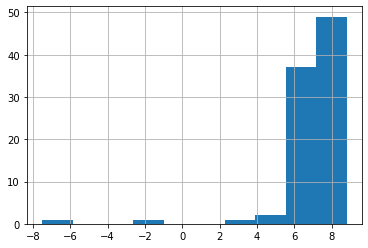

In [62]:
df_imdb.imdb_score.hist()

In [63]:
df_imdb.loc[df_imdb.imdb_score<0,'imdb_score']=np.nan

In [64]:
df_imdb.loc[df_imdb.imdb_score.isnull(),'imdb_score']=np.round(df_imdb.imdb_score.mean(),1)

<AxesSubplot:>

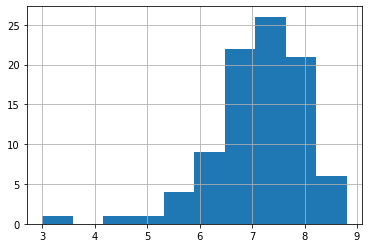

In [115]:
df_imdb.imdb_score.hist()

### Columna `country`

In [65]:
df_imdb.country.value_counts(dropna=False)

USA               72
UK                 6
usa                3
France             2
Germany            1
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

In [66]:
df_imdb.loc[(df_imdb.country.str.strip()=='usa') | (df_imdb.country.str.strip()=='United States'),'country']='USA'

In [116]:
df_imdb.country.value_counts(dropna=False)

USA               76
UK                 6
France             2
Germany            1
New Zealand        1
India              1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

### Columna `language`

In [117]:
df_imdb.language.value_counts(dropna=False)

English    86
French      2
German      1
Czech       1
Kyrgyz      1
Name: language, dtype: int64

In [69]:
df_imdb.language.describe()

count          91
unique          1
top       English
freq           91
Name: language, dtype: object

In [ ]:
df_imdb.loc[df_imdb.country=='France','language']='French'
df_imdb.loc[df_imdb.country=='Germany','language']='German'
df_imdb.loc[df_imdb.country=='Czech Republic','language']='Czech'
df_imdb.loc[df_imdb.country=='Kyrgyzstan','language']='Kyrgyz'

### Columna `movie_facebook_likes`

In [74]:
df_imdb.movie_facebook_likes.value_counts(dropna=False)

0         7
82000     3
24000     2
47000     2
39000     2
         ..
146000    1
5000      1
95000     1
85000     1
31000     1
Name: movie_facebook_likes, Length: 67, dtype: int64

In [197]:
df_imdb.movie_facebook_likes.describe()

count        91.000000
mean      65829.945055
std       58602.262111
min           0.000000
25%       25000.000000
50%       54000.000000
75%       84000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [118]:
df_imdb.movie_facebook_likes.sort_values()

95         0
92         0
3          0
42         0
47         0
       ...  
38    175000
24    190000
5     197000
16    199000
13    349000
Name: movie_facebook_likes, Length: 91, dtype: int64

<AxesSubplot:>

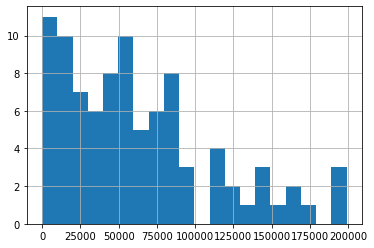

In [121]:
df_imdb.movie_facebook_likes.hist(bins=20)

In [119]:
df_imdb.loc[df_imdb.movie_facebook_likes>3e5,'movie_facebook_likes']=np.nan

In [120]:
df_imdb.loc[df_imdb.movie_facebook_likes.isnull(),'movie_facebook_likes']=df_imdb.movie_facebook_likes.median()

### Columna `actors`

In [75]:
df_imdb.actors.value_counts(dropna=False)

Aidan Turner,Adam Brown,James Nesbitt                   3
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau       1
Robert Downey Jr.,Robert Duvall,Leighton Meester        1
Brad Pitt,Tye Sheridan,Fiona Shaw                       1
                                                       ..
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Lesley Manville,Ruth Sheen,Karl Johnson                 1
Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill          1
Christian Bale,María Valverde,Ben Mendelsohn            1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: actors, Length: 88, dtype: int64

In [76]:
df_imdb.actors.str.split(',').str.len().max()

3

In [77]:
col_actors=df_imdb.actors.str.split(',',n=3,expand=True)

In [78]:
df_imdb['actor_0']=col_actors[0]
df_imdb['actor_1']=col_actors[1]
df_imdb['actor_2']=col_actors[2]

In [79]:
df_imdb

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,...,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,actor_0,actor_1,actor_2
0,Color,Martin Scorsese,240.0,116866727.0,The Wolf Of Wall Street,2013,English,USA,100000000.0,8.2,...,138000,1000,Biography,Comedy,Crime,Drama,None,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Color,Shane Black,195.0,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,...,95000,1000,Action,Adventure,Sci-Fi,None,None,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Color,Quentin Tarantino,187.0,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,...,114000,1000,Crime,Drama,Mystery,Thriller,Western,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Color,Kenneth Lonergan,186.0,46495.0,Margaret,2011,English,USA,14000000.0,6.5,...,0,1000,Drama,None,None,None,None,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Color,Peter Jackson,186.0,258355354.0,The Hobbit: The Desolation Of Smaug,2013,English,USA,225000000.0,7.9,...,83000,1000,Adventure,Fantasy,None,None,None,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134.0,56667870.0,12 Years A Slave,2013,English,USA,20000000.0,8.1,...,83000,1000,Biography,Drama,History,None,None,Quvenzhané Wallis,Scoot McNairy,Taran Killam
95,Color,Richard J. Lewis,134.0,7501404.0,Barney'S Version,2010,English,Canada,102182415.0,7.3,...,0,1000,Comedy,Drama,None,None,None,Mark Addy,Atom Egoyan,Paul Gross
96,Color,Paul Greengrass,134.0,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,...,65000,1000,Biography,Drama,Thriller,None,None,Tom Hanks,Chris Mulkey,Michael Chernus
97,Color,David Ayer,134.0,85707116.0,Fury,2014,English,USA,68000000.0,7.6,...,82000,1000,Action,Drama,War,None,None,Brad Pitt,Logan Lerman,Jim Parrack


In [80]:
df_imdb.drop('actors',axis=1,inplace=True)

## GENEROS MÁS REPETIDOS

In [107]:
df_imdb.groupby(['genero_1']).size().sort_values(ascending=False)

genero_1
Action       30
Drama        19
Adventure    12
Biography    12
Crime        11
Comedy        6
Mystery       1
dtype: int64

In [99]:
df_imdb.groupby(['genero_2']).size().sort_values(ascending=False)

genero_2
Drama        31
Adventure    23
Sci-Fi        4
Crime         4
Fantasy       4
Romance       3
Thriller      3
Western       2
History       2
Biography     2
Animation     1
Musical       1
Mystery       1
Comedy        1
Sport         1
War           1
Horror        1
dtype: int64

In [100]:
df_imdb.groupby(['genero_3']).size().sort_values(ascending=False)

genero_3
Thriller    16
Sci-Fi      15
Drama        8
History      6
Fantasy      5
Mystery      4
Crime        2
Music        2
Romance      2
Musical      1
Sport        1
War          1
Western      1
dtype: int64

In [101]:
df_imdb.groupby(['genero_4']).size().sort_values(ascending=False)

genero_4
Thriller    7
History     4
Sci-Fi      4
War         3
Drama       1
Musical     1
Mystery     1
Romance     1
Western     1
dtype: int64

In [102]:
df_imdb.groupby(['genero_5']).size().sort_values(ascending=False)

genero_5
Thriller    2
Music       1
Romance     1
War         1
Western     1
dtype: int64

## ACTORES MÁS REPETIDOS

In [108]:
df_imdb.groupby(['actor_0']).size().sort_values(ascending=False)

actor_0
Leonardo DiCaprio       7
Jennifer Lawrence       6
Aidan Turner            3
Emma Stone              3
Tom Hanks               3
                       ..
Albert Finney           1
Joseph Gordon-Levitt    1
Kate Winslet            1
Kristen Stewart         1
Bingbing Li             1
Length: 61, dtype: int64

In [109]:
df_imdb.groupby(['actor_1']).size().sort_values(ascending=False)

actor_1
Adam Brown           3
Christian Bale       2
Tom Hardy            2
Robert Downey Jr.    2
Josh Hutcherson      2
                    ..
Harold Perrineau     1
Hal Holbrook         1
Goran Visnjic        1
Frank Grillo         1
William Hurt         1
Length: 84, dtype: int64

In [110]:
df_imdb.groupby(['actor_2']).size().sort_values(ascending=False)

actor_2
James Nesbitt           3
Billy Crudup            2
Kevin Dunn              2
Joseph Gordon-Levitt    2
Scarlett Johansson      2
                       ..
Gary Stretch            1
Fiona Shaw              1
Emily Ratajkowski       1
Eddie Marsan            1
Zoë Bell                1
Length: 85, dtype: int64